## Dynamic FBA analysis

Here we simulate a batch cultivation with the following conditions:

- Aerobic 

- Carbon source: SUCROSE


'' is not a valid SBML 'SId'.


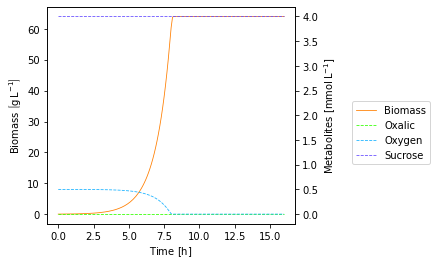

In [47]:
from os.path import dirname, join, pardir

from cobra.io import read_sbml_model

from dfba import DfbaModel, ExchangeFlux, KineticVariable

from cobra.io import read_sbml_model
fba_model = read_sbml_model('Model_iJB1325_ATCC1015.xml')
fba_model.solver = "glpk"

dfba_model = DfbaModel(fba_model)

X = KineticVariable("Biomass")
#Glu = KineticVariable("Glucose")
Suc = KineticVariable("Sucrose")
Oxy = KineticVariable("Oxygen")
Oxal = KineticVariable("Oxalic")

dfba_model.add_kinetic_variables([X, Suc, Oxy, Oxal])
#dfba_model.add_kinetic_variables([X, Glu, Oxy, Oxal])

mu = ExchangeFlux("DRAIN_Biomass")
#v_G = ExchangeFlux("BOUNDARY_GLCe")
v_S = ExchangeFlux("BOUNDARY_SUCe")
v_Ox = ExchangeFlux("r51")
v_O = ExchangeFlux("BOUNDARY_O2e")

dfba_model.add_exchange_fluxes([mu, v_S, v_O, v_Ox])
#dfba_model.add_exchange_fluxes([mu, v_G, v_O, v_Ox])

dfba_model.add_rhs_expression("Biomass", mu * X)
#dfba_model.add_rhs_expression("Glucose", v_G * X / 1000.0)
dfba_model.add_rhs_expression("Sucrose", v_S * X /1000)
dfba_model.add_rhs_expression("Oxalic", v_Ox * X /1000)
dfba_model.add_rhs_expression("Oxygen", v_O * X /1000)


vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("BOUNDARY_O2e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

dfba_model.add_initial_conditions(
    {
        "Biomass": 0.03,
        "Sucrose": 4.0,
        #"Glucose": 4.0,
        "Oxalic": 0.0,
        "Oxygen": 0.5,
        
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 16.0, 0.1, ["BOUNDARY_SUCe", "r51", "BOUNDARY_O2e"])
#concentrations, trajectories = dfba_model.simulate(0.0, 16.0, 0.1, ["BOUNDARY_GLCe", "r51", "BOUNDARY_O2e"])

from dfba.plot.matplotlib import *
fig = plot_concentrations(concentrations)

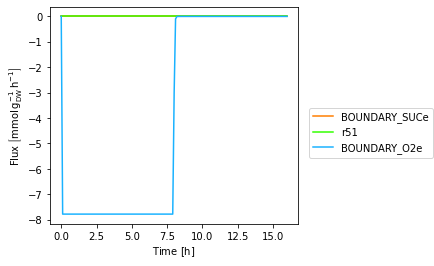

In [48]:

plot_trajectories(trajectories)


Here we simulate a batch cultivation with the following conditions:

- Aerobic 

- Carbon source: GLUCOSE

'' is not a valid SBML 'SId'.


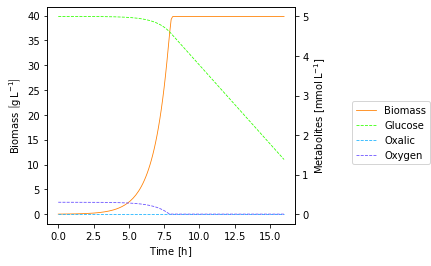

In [122]:
from os.path import dirname, join, pardir

from cobra.io import read_sbml_model

from dfba import DfbaModel, ExchangeFlux, KineticVariable

from cobra.io import read_sbml_model
fba_model = read_sbml_model('Model_iJB1325_ATCC1015.xml')
fba_model.solver = "glpk"

dfba_model = DfbaModel(fba_model)

X = KineticVariable("Biomass")
Glu = KineticVariable("Glucose")
#Suc = KineticVariable("Sucrose")
Oxy = KineticVariable("Oxygen")
Oxal = KineticVariable("Oxalic")

#dfba_model.add_kinetic_variables([X, Suc, Oxy, Oxal])
dfba_model.add_kinetic_variables([X, Glu, Oxy, Oxal])

mu = ExchangeFlux("DRAIN_Biomass")
v_G = ExchangeFlux("BOUNDARY_GLCe")
#v_S = ExchangeFlux("BOUNDARY_SUCe")
v_Ox = ExchangeFlux("BOUNDARY_OXALe")
v_O = ExchangeFlux("BOUNDARY_O2e")

#dfba_model.add_exchange_fluxes([mu, v_S, v_O, v_Ox])
dfba_model.add_exchange_fluxes([mu, v_G, v_O, v_Ox])

dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Glucose", v_G * X / 1000.0)
#dfba_model.add_rhs_expression("Sucrose", v_S * X /1000)
dfba_model.add_rhs_expression("Oxalic", v_Ox * 30*X)
dfba_model.add_rhs_expression("Oxygen", v_O * X /1000)


vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("BOUNDARY_O2e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

dfba_model.add_initial_conditions(
    {
        "Biomass": 0.02,
        "Glucose": 5.0,
        "Oxalic": 0.0,
        "Oxygen": 0.3,
        
    }
)
#concentrations, trajectories = dfba_model.simulate(0.0, 16.0, 0.1, ["BOUNDARY_SUCe", "r51", "BOUNDARY_O2e"])
concentrations, trajectories = dfba_model.simulate(0.0, 16.0, 0.1, ["BOUNDARY_GLCe", "BOUNDARY_OXALe", "BOUNDARY_O2e"])

from dfba.plot.matplotlib import *
fig = plot_concentrations(concentrations)

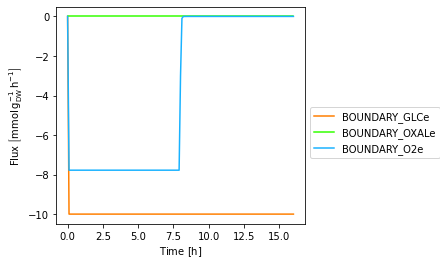

In [64]:
plot_trajectories(trajectories)

Here we simulate a batch cultivation with the following conditions:

- Aerobic 

- Carbon source: Lactose

'' is not a valid SBML 'SId'.


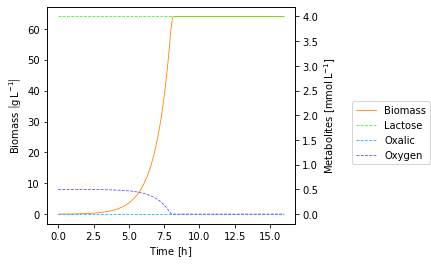

In [52]:
from os.path import dirname, join, pardir

from cobra.io import read_sbml_model

from dfba import DfbaModel, ExchangeFlux, KineticVariable

from cobra.io import read_sbml_model
fba_model = read_sbml_model('Model_iJB1325_ATCC1015.xml')
fba_model.solver = "glpk"

dfba_model = DfbaModel(fba_model)

X = KineticVariable("Biomass")
Lac = KineticVariable("Lactose")
#Suc = KineticVariable("Sucrose")
Oxy = KineticVariable("Oxygen")
Oxal = KineticVariable("Oxalic")

#dfba_model.add_kinetic_variables([X, Suc, Oxy, Oxal])
dfba_model.add_kinetic_variables([X, Lac, Oxy, Oxal])

mu = ExchangeFlux("DRAIN_Biomass")
v_L = ExchangeFlux("BOUNDARY_LACTe")
#v_S = ExchangeFlux("BOUNDARY_SUCe")
v_Ox = ExchangeFlux("r51")
v_O = ExchangeFlux("BOUNDARY_O2e")

#dfba_model.add_exchange_fluxes([mu, v_S, v_O, v_Ox])
dfba_model.add_exchange_fluxes([mu, v_L, v_O, v_Ox])

dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Lactose", v_L * X / 1000.0)
#dfba_model.add_rhs_expression("Sucrose", v_S * X /1000)
dfba_model.add_rhs_expression("Oxalic", v_Ox * X /1000)
dfba_model.add_rhs_expression("Oxygen", v_O * X /1000)


vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("BOUNDARY_O2e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

dfba_model.add_initial_conditions(
    {
        "Biomass": 0.03,
        "Lactose": 4.0,
        "Oxalic": 0.0,
        "Oxygen": 0.5,
        
    }
)
#concentrations, trajectories = dfba_model.simulate(0.0, 16.0, 0.1, ["BOUNDARY_SUCe", "r51", "BOUNDARY_O2e"])
concentrations, trajectories = dfba_model.simulate(0.0, 16.0, 0.1, ["BOUNDARY_LACTe", "r51", "BOUNDARY_O2e"])

from dfba.plot.matplotlib import *
fig = plot_concentrations(concentrations)

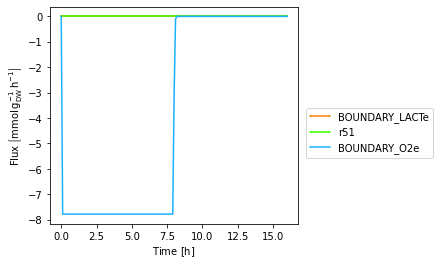

In [54]:
plot_trajectories(trajectories)

Here we simulate a batch cultivation with the following conditions:

- Anaerobic 

- Carbon source: Sucrose

'' is not a valid SBML 'SId'.


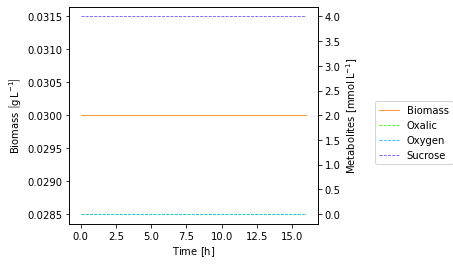

In [55]:
from os.path import dirname, join, pardir

from cobra.io import read_sbml_model

from dfba import DfbaModel, ExchangeFlux, KineticVariable

from cobra.io import read_sbml_model
fba_model = read_sbml_model('Model_iJB1325_ATCC1015.xml')
fba_model.solver = "glpk"

dfba_model = DfbaModel(fba_model)

X = KineticVariable("Biomass")
#Glu = KineticVariable("Glucose")
Suc = KineticVariable("Sucrose")
Oxy = KineticVariable("Oxygen")
Oxal = KineticVariable("Oxalic")

dfba_model.add_kinetic_variables([X, Suc, Oxy, Oxal])
#dfba_model.add_kinetic_variables([X, Glu, Oxy, Oxal])

mu = ExchangeFlux("DRAIN_Biomass")
#v_G = ExchangeFlux("BOUNDARY_GLCe")
v_S = ExchangeFlux("BOUNDARY_SUCe")
v_Ox = ExchangeFlux("r51")
v_O = ExchangeFlux("BOUNDARY_O2e")

dfba_model.add_exchange_fluxes([mu, v_S, v_O, v_Ox])
#dfba_model.add_exchange_fluxes([mu, v_G, v_O, v_Ox])

dfba_model.add_rhs_expression("Biomass", mu * X)
#dfba_model.add_rhs_expression("Glucose", v_G * X / 1000.0)
dfba_model.add_rhs_expression("Sucrose", v_S * X /1000)
dfba_model.add_rhs_expression("Oxalic", v_Ox * X /1000)
dfba_model.add_rhs_expression("Oxygen", 0)


vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("BOUNDARY_O2e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

dfba_model.add_initial_conditions(
    {
        "Biomass": 0.03,
        "Sucrose": 4.0,
        #"Glucose": 4.0,
        "Oxalic": 0.0,
        "Oxygen": 0.0,
        
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 16.0, 0.1, ["BOUNDARY_SUCe", "r51", "BOUNDARY_O2e"])
#concentrations, trajectories = dfba_model.simulate(0.0, 16.0, 0.1, ["BOUNDARY_GLCe", "r51", "BOUNDARY_O2e"])

from dfba.plot.matplotlib import *
fig = plot_concentrations(concentrations)

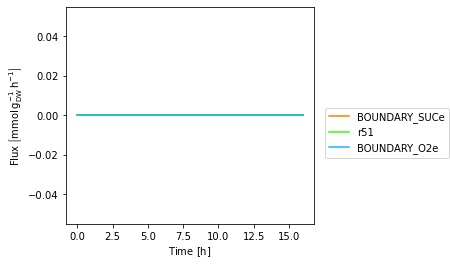

In [56]:
plot_trajectories(trajectories)

Here we simulate a batch cultivation with the following conditions:

- Anaerobic 

- Carbon source: Sucrose

'' is not a valid SBML 'SId'.


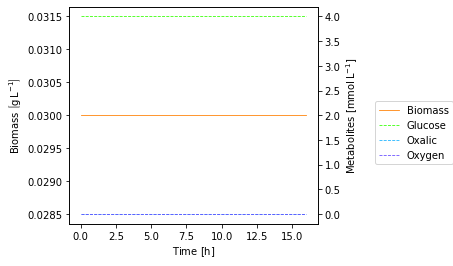

In [58]:
from os.path import dirname, join, pardir

from cobra.io import read_sbml_model

from dfba import DfbaModel, ExchangeFlux, KineticVariable

from cobra.io import read_sbml_model
fba_model = read_sbml_model('Model_iJB1325_ATCC1015.xml')
fba_model.solver = "glpk"

dfba_model = DfbaModel(fba_model)

X = KineticVariable("Biomass")
Glu = KineticVariable("Glucose")
#Suc = KineticVariable("Sucrose")
Oxy = KineticVariable("Oxygen")
Oxal = KineticVariable("Oxalic")

#dfba_model.add_kinetic_variables([X, Suc, Oxy, Oxal])
dfba_model.add_kinetic_variables([X, Glu, Oxy, Oxal])

mu = ExchangeFlux("DRAIN_Biomass")
v_G = ExchangeFlux("BOUNDARY_GLCe")
#v_S = ExchangeFlux("BOUNDARY_SUCe")
v_Ox = ExchangeFlux("r51")
v_O = ExchangeFlux("BOUNDARY_O2e")

#dfba_model.add_exchange_fluxes([mu, v_S, v_O, v_Ox])
dfba_model.add_exchange_fluxes([mu, v_G, v_O, v_Ox])

dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Glucose", v_G * X / 1000.0)
#dfba_model.add_rhs_expression("Sucrose", v_S * X /1000)
dfba_model.add_rhs_expression("Oxalic", v_Ox * X /1000)
dfba_model.add_rhs_expression("Oxygen", 0)


vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("BOUNDARY_O2e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

dfba_model.add_initial_conditions(
    {
        "Biomass": 0.03,
        "Glucose": 4.0,
        "Oxalic": 0.0,
        "Oxygen": 0.0,
        
    }
)
#concentrations, trajectories = dfba_model.simulate(0.0, 16.0, 0.1, ["BOUNDARY_SUCe", "r51", "BOUNDARY_O2e"])
concentrations, trajectories = dfba_model.simulate(0.0, 16.0, 0.1, ["BOUNDARY_GLCe", "r51", "BOUNDARY_O2e"])

from dfba.plot.matplotlib import *
fig = plot_concentrations(concentrations)

'' is not a valid SBML 'SId'.


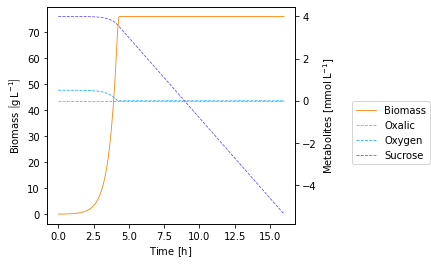

In [62]:
from os.path import dirname, join, pardir

from cobra.io import read_sbml_model

from dfba import DfbaModel, ExchangeFlux, KineticVariable

from cobra.io import read_sbml_model
fba_model = read_sbml_model('Model_iJB1325_ATCC1015.xml')


medium_SUCe = fba_model.medium
medium_SUCe['BOUNDARY_GLCe']=0
medium_SUCe['BOUNDARY_SUCe']=10
fba_model.medium=medium_SUCe
print(fba_model)
fba_model.solver = "glpk"
dfba_model = DfbaModel(fba_model)

X = KineticVariable("Biomass")
#Glu = KineticVariable("Glucose")
Suc = KineticVariable("Sucrose")
Oxy = KineticVariable("Oxygen")
Oxal = KineticVariable("Oxalic")

dfba_model.add_kinetic_variables([X, Suc, Oxy, Oxal])
#dfba_model.add_kinetic_variables([X, Glu, Oxy, Oxal])

mu = ExchangeFlux("DRAIN_Biomass")
#v_G = ExchangeFlux("BOUNDARY_GLCe")
v_S = ExchangeFlux("BOUNDARY_SUCe")
v_Ox = ExchangeFlux("BOUNDARY_OXALe")
v_O = ExchangeFlux("BOUNDARY_O2e")

dfba_model.add_exchange_fluxes([mu, v_S, v_O, v_Ox])
#dfba_model.add_exchange_fluxes([mu, v_G, v_O, v_Ox])

dfba_model.add_rhs_expression("Biomass", mu * X)
#dfba_model.add_rhs_expression("Glucose", v_G * X / 1000.0)
dfba_model.add_rhs_expression("Sucrose", v_S * X /1000)
dfba_model.add_rhs_expression("Oxalic", v_Ox * X /1000)
dfba_model.add_rhs_expression("Oxygen", v_O * X /1000)


vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("BOUNDARY_O2e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

dfba_model.add_initial_conditions(
    {
        "Biomass": 0.03,
        "Sucrose": 4.0,
        #"Glucose": 4.0,
        "Oxalic": 0.0,
        "Oxygen": 0.5,
        
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 16.0, 0.1, ["BOUNDARY_SUCe", "BOUNDARY_OXALe", "BOUNDARY_O2e"])
#concentrations, trajectories = dfba_model.simulate(0.0, 16.0, 0.1, ["BOUNDARY_GLCe", "r51", "BOUNDARY_O2e"])

from dfba.plot.matplotlib import *
fig = plot_concentrations(concentrations)

In [61]:
model.exchanges.BOUNDARY_OXALe

Reaction identifier,BOUNDARY_OXALe
Name,
Memory address,0x07fe9144d2a60
Stoichiometry,OXALe --> Oxalate (extracellular) -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [72]:
from cobra.io import read_sbml_model
model = read_sbml_model('Model_iJB1325_ATCC1015.xml')
model1 = model
model1.objective = model1.reactions.get_by_id('BOUNDARY_OXALe')
solution = model1.optimize()
print(solution)
Oxalate_production_GLCe = solution.fluxes['BOUNDARY_OXALe']
print(Oxalate_production_GLCe)


'' is not a valid SBML 'SId'.


<Solution 30.000 at 0x7fe91dd47a90>
30.00000000000002


In [97]:
from cobra.io import read_sbml_model
model = read_sbml_model('Model_iJB1325_ATCC1015.xml')
model1 = model
model1.objective = model1.reactions.get_by_id('BOUNDARY_GLCe')
solution = model1.optimize()
print(solution)
Oxalate_production_GLCe = solution.fluxes['BOUNDARY_GLCe']
print(Oxalate_production_GLCe)


'' is not a valid SBML 'SId'.


<Solution 0.000 at 0x7fe8e6de8df0>
0.0


In [94]:
from cobra.io import read_sbml_model
model = read_sbml_model('Model_iJB1325_ATCC1015.xml')

'' is not a valid SBML 'SId'.


In [95]:
solution = model.optimize()

In [96]:
solution.fluxes['BOUNDARY_OXALe']

0.0

In [111]:
from cobra.io import read_sbml_model
model = read_sbml_model('Model_iJB1325_ATCC1015.xml')
medium = model.medium

with model:
    model.medium = medium
    model.objective = model.reactions.get_by_id("BOUNDARY_OXALe")
    put_production = model.optimize().objective_value
    print("Max. putriscine production [mmol gDW^-1 h^-1]:", put_production)
    print("Theoretical max. yield [mmol-put / mmol-glc]:", put_production / (-1* model.reactions.get_by_id('BOUNDARY_GLCe').flux))
   

'' is not a valid SBML 'SId'.


Max. putriscine production [mmol gDW^-1 h^-1]: 30.00000000000002
Theoretical max. yield [mmol-put / mmol-glc]: 3.000000000000002


'' is not a valid SBML 'SId'.


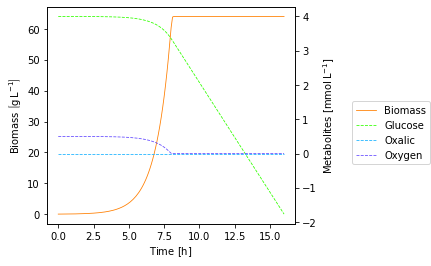

In [120]:
from os.path import dirname, join, pardir

from cobra.io import read_sbml_model

from dfba import DfbaModel, ExchangeFlux, KineticVariable

from cobra.io import read_sbml_model
fba_model = read_sbml_model('Model_iJB1325_ATCC1015.xml')
fba_model.solver = "glpk"

dfba_model = DfbaModel(fba_model)

X = KineticVariable("Biomass")
Glu = KineticVariable("Glucose")
#Suc = KineticVariable("Sucrose")
Oxy = KineticVariable("Oxygen")
Oxal = KineticVariable("Oxalic")

#dfba_model.add_kinetic_variables([X, Suc, Oxy, Oxal])
dfba_model.add_kinetic_variables([X, Glu, Oxy, Oxal])

mu = ExchangeFlux("DRAIN_Biomass")
v_G = ExchangeFlux("BOUNDARY_GLCe")
#v_S = ExchangeFlux("BOUNDARY_SUCe")
v_Ox = ExchangeFlux("BOUNDARY_OXALe")
v_O = ExchangeFlux("BOUNDARY_O2e")

#dfba_model.add_exchange_fluxes([mu, v_S, v_O, v_Ox])
dfba_model.add_exchange_fluxes([mu, v_G, v_O, v_Ox])

dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Glucose", v_G *X/1000 )
#dfba_model.add_rhs_expression("Sucrose", v_S *  0.09398547241492919 *X)
dfba_model.add_rhs_expression("Oxalic", v_Ox *X /1000)
dfba_model.add_rhs_expression("Oxygen", v_O *X /1000)



vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("BOUNDARY_O2e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

dfba_model.add_initial_conditions(
    {
        "Biomass": 0.03,
        #"Sucrose": 4.0,
        "Glucose": 4.0,
        "Oxalic": 0.0,
        "Oxygen": 0.5,
        
    }
)
#concentrations, trajectories = dfba_model.simulate(0.0, 16.0, 0.1, ["BOUNDARY_SUCe", "BOUNDARY_OXALe", "BOUNDARY_O2e"])
concentrations, trajectories = dfba_model.simulate(0.0, 16.0, 0.1, ["BOUNDARY_GLCe", "BOUNDARY_OXALe", "BOUNDARY_O2e"])

from dfba.plot.matplotlib import *
fig = plot_concentrations(concentrations)